# Import the required modules

In [1]:


#import the model network packages from the 'mod'  module
from mod.network import net
#importing the augmentation packages from preprocessing module
from preprocessing.augmentation import aug

In [2]:
import matplotlib.pyplot as plt  # plotting library        
import cv2                       # working with, mainly resizing, images
import numpy as np               # dealing with arrays
import os                        # dealing with directories
import pandas as pd              # providing data structures and data analysis tools
import tensorflow as tf       
import random
from random import shuffle       # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm            # a nice pretty percentage bar for tasks. Thanks to viewer Daniel Bühler for this suggestion
from PIL import Image
from scipy import ndimage
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
%matplotlib inline
np.random.seed(1)
from keras.callbacks import ModelCheckpoint, EarlyStopping


# Train and Test dir

In [3]:

train_dir = r'dataset\train'
test_dir = r'dataset\test'

dataset\train\without_mask
(270, 180, 3)
dataset\train\with_mask
(428, 320, 3)


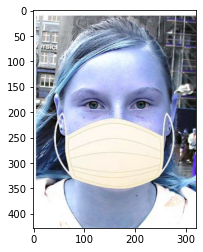

In [4]:

for i in os.listdir(train_dir):
    b=os.path.join(train_dir,i)
    print(b)
    c=os.listdir(os.path.join(train_dir,i))
    for j in c:
        d=os.path.join(b,j)
        img=cv2.imread(d)
        print(img.shape)
        
        plt.imshow(img)
        break

# Performing Data Augmentation

In [5]:
generate=aug()
train_generator=generate.train_augment(train_dir)
test_generator=generate.test_augment(test_dir)

Found 616 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [6]:
train_num = train_generator.samples
validation_num = test_generator.samples


# Training the model

In [25]:
batch_size = 64
epochs=10
model=net().build()
filepath=str(os.getcwd()+"\weights.hdf5")
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
stopper = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list = [checkpoint, stopper]
history=model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list, 
                              verbose = 1)
 

Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 1.0408 - acc: 0.5091
Epoch 00001: val_acc improved from -inf to 0.56771, saving model to C:\Users\shkatta\OneDrive - Capgemini\Desktop\detect\weights.hdf5
9/9 [==============================] - 16s 2s/step - loss: 1.0408 - acc: 0.5091 - val_loss: 0.6645 - val_acc: 0.5677
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 0.6337 - acc: 0.6285
Epoch 00002: val_acc improved from 0.56771 to 0.63542, saving model to C:\Users\shkatta\OneDrive - Capgemini\Desktop\detect\weights.hdf5
9/9 [==============================] - 15s 2s/step - loss: 0.6337 - acc: 0.6285 - val_loss: 0.5817 - val_acc: 0.6354
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 0.4824 - acc: 0.7844
Epoch 00003: val_acc improved from 0.63542 to 0.84375, saving model to C:\Users\shkatta\OneDrive - Capgemini\Desktop\detect\weights.hdf5
9/9 [==============================] - 15s 2s/step - loss: 0.4824 - acc: 0.7844 - val_loss: 0.414

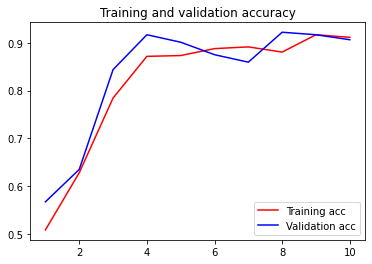

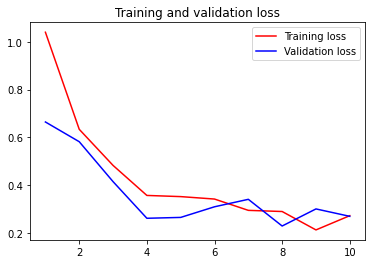

In [26]:

class plot:
    @staticmethod
    def plotting():
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(acc) + 1)

        plt.title('Training and validation accuracy')
        plt.plot(epochs, acc, 'red', label='Training acc')
        plt.plot(epochs, val_acc, 'blue', label='Validation acc')
        plt.legend()

        plt.figure()
        plt.title('Training and validation loss')
        plt.plot(epochs, loss, 'red', label='Training loss')
        plt.plot(epochs, val_loss, 'blue', label='Validation loss')

        plt.legend()
        plt.show()
        
        
pt=plot().plotting( )        

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


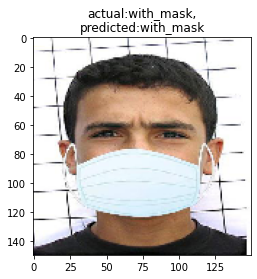

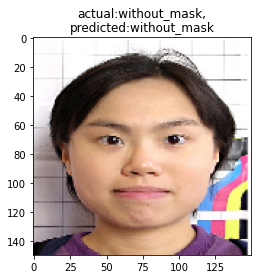

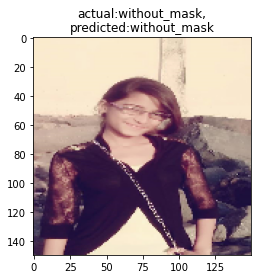

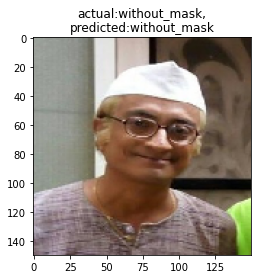

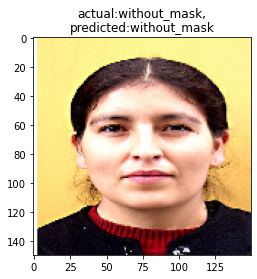

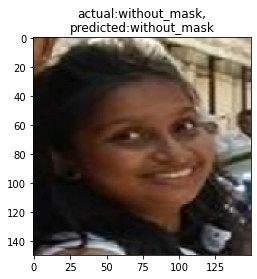

In [14]:
weights_path=str(os.getcwd()+"\weights.hdf5")
def load_trained_model(weights_path):
    model=net().build()
    model.load_weights(weights_path)
    x,y=test_generator.next()
    predictions = model.predict_classes(test_generator)
    for i in range(0,6):
        image = x[i]
        image_label=y[i]
        image_label='with_mask' if image_label[0]==1 else 'without_mask'
        pred=predictions[i]
        pred='with_mask' if pred==0 else 'without_mask'
        #print('output',image_label)
        plt.title(f"actual:{image_label},\npredicted:{pred}")
        plt.imshow(image)
        plt.show()
load_trained_model(weights_path)   